## Canadian Nursing Workforce Data and Spatial Analysis


> This (ongoing) data analysis is an attempt to better understand and visualize issues that are occuring with the nursing workforce accross each province of canada and possibly find patterns that can potentially help find solutions to these problems such as nursing shortages, workload, mental health, policies etcc... through the use of availabe open data

### GIS Connection and Importing Packages

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from arcgis.gis import GIS
gis = GIS("home")

### Nursing Workforce Data Retrieval
#### Data retrieved from Canadian Insitute of Health Information: Access Data and Reports library
##### https://www.cihi.ca/en/access-data-and-reports

In [26]:
nursing_workforce = pd.read_excel('/arcgis/home/Book3.xlsx')

### Data Cleaning and Formatting

In [27]:
nursing_workforce.head()

,"Screen reader users: There is 1 table on this tab called Table 5: Workforce of regulated nurses, by type of professional and jurisdiction, provinces/territories with available data, 2012 to 2021. It begins at cell A5 and ends at cell Y465. A link back to the table of contents is in cell A2.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Back to the Table of contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Table 6 Workforce of regulated nurses, by typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Notes for this table are on the tab Table 4 an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,Jurisdiction,Type of professional,Workforce: number \nof nurses,Workforce: employed \nfull time,Workforce: employed \npart time,Workforce: employed \ncasual,Workforce: employed status unknown,"Workforce: \nplace of work, hospital","Workforce: \nplace of work, community health",...,"Workforce: position, other","Workforce: position, \nnot stated","Workforce: \narea of responsibility, direct care","Workforce: \narea of responsibility, administr...","Workforce: \narea of responsibility, education","Workforce: \narea of responsibility, research","Workforce: \narea of responsibility, not stated","Workforce: geography, urban","Workforce: geography, rural/remote","Workforce: geography, \nnot stated"
4,2013,Newfoundland and Labrador,Nurse practitioners,124,110,7,7,0,56,30,...,112,0,111,6,6,1,0,74,50,0


In [28]:
nursing_workforce.columns = nursing_workforce.iloc[3]
nursing_workforce = nursing_workforce.drop(nursing_workforce.index[0:4])
nursing_workforce = nursing_workforce.dropna()

In [29]:
nursing_workforce.head()

3,Year,Jurisdiction,Type of professional,Workforce: number \nof nurses,Workforce: employed \nfull time,Workforce: employed \npart time,Workforce: employed \ncasual,Workforce: employed status unknown,"Workforce: \nplace of work, hospital","Workforce: \nplace of work, community health",...,"Workforce: position, other","Workforce: position, \nnot stated","Workforce: \narea of responsibility, direct care","Workforce: \narea of responsibility, administration","Workforce: \narea of responsibility, education","Workforce: \narea of responsibility, research","Workforce: \narea of responsibility, not stated","Workforce: geography, urban","Workforce: geography, rural/remote","Workforce: geography, \nnot stated"
4,2013,Newfoundland and Labrador,Nurse practitioners,124,110,7,7,0,56,30,...,112,0,111,6,6,1,0,74,50,0
5,2013,Prince Edward Island,Nurse practitioners,5,5,0,0,0,0,4,...,5,0,4,0,1,0,0,4,1,0
6,2013,Nova Scotia,Nurse practitioners,132,112,12,8,0,57,60,...,124,0,125,1,5,1,0,86,45,1
7,2013,New Brunswick,Nurse practitioners,102,83,16,3,0,33,52,...,86,0,98,0,4,0,0,63,39,0
8,2013,Quebec,Nurse practitioners,201,190,10,1,0,85,55,...,192,0,200,1,0,0,0,163,38,0


In [30]:
nursing_workforce.columns = nursing_workforce.columns.str.replace('\n', '')
nursing_workforce.iloc[0]

3
Year                                                                      2013
Jurisdiction                                         Newfoundland and Labrador
Type of professional                                       Nurse practitioners
Workforce: number of nurses                                                124
Workforce: employed full time                                              110
Workforce: employed part time                                                7
Workforce: employed casual                                                   7
Workforce: employed status unknown                                           0
Workforce: place of work, hospital                                          56
Workforce: place of work, community health                                  30
Workforce: place of work, nursing home/LTC                                   9
Workforce: place of work, other                                             29
Workforce: place of work, not stated              

### Data Exploration and Information

In [31]:
nursing_workforce.head()

3,Year,Jurisdiction,Type of professional,Workforce: number of nurses,Workforce: employed full time,Workforce: employed part time,Workforce: employed casual,Workforce: employed status unknown,"Workforce: place of work, hospital","Workforce: place of work, community health",...,"Workforce: position, other","Workforce: position, not stated","Workforce: area of responsibility, direct care","Workforce: area of responsibility, administration","Workforce: area of responsibility, education","Workforce: area of responsibility, research","Workforce: area of responsibility, not stated","Workforce: geography, urban","Workforce: geography, rural/remote","Workforce: geography, not stated"
4,2013,Newfoundland and Labrador,Nurse practitioners,124,110,7,7,0,56,30,...,112,0,111,6,6,1,0,74,50,0
5,2013,Prince Edward Island,Nurse practitioners,5,5,0,0,0,0,4,...,5,0,4,0,1,0,0,4,1,0
6,2013,Nova Scotia,Nurse practitioners,132,112,12,8,0,57,60,...,124,0,125,1,5,1,0,86,45,1
7,2013,New Brunswick,Nurse practitioners,102,83,16,3,0,33,52,...,86,0,98,0,4,0,0,63,39,0
8,2013,Quebec,Nurse practitioners,201,190,10,1,0,85,55,...,192,0,200,1,0,0,0,163,38,0


In [32]:
nursing_workforce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 4 to 463
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Year                                               460 non-null    object
 1   Jurisdiction                                       460 non-null    object
 2   Type of professional                               460 non-null    object
 3   Workforce: number of nurses                        460 non-null    object
 4   Workforce: employed full time                      460 non-null    object
 5   Workforce: employed part time                      460 non-null    object
 6   Workforce: employed casual                         460 non-null    object
 7   Workforce: employed status unknown                 460 non-null    object
 8   Workforce: place of work, hospital                 460 non-null    object
 9   Workforce: place of w

In [33]:
nursing_workforce = nursing_workforce.drop(nursing_workforce.index[-1])
nursing_workforce.tail()

3,Year,Jurisdiction,Type of professional,Workforce: number of nurses,Workforce: employed full time,Workforce: employed part time,Workforce: employed casual,Workforce: employed status unknown,"Workforce: place of work, hospital","Workforce: place of work, community health",...,"Workforce: position, other","Workforce: position, not stated","Workforce: area of responsibility, direct care","Workforce: area of responsibility, administration","Workforce: area of responsibility, education","Workforce: area of responsibility, research","Workforce: area of responsibility, not stated","Workforce: geography, urban","Workforce: geography, rural/remote","Workforce: geography, not stated"
458,2022,Alberta,Licensed practical nurses,15511,6413,6342,2756,0,5799,4154,...,1600,0,13844,1398,246,23,0,13157,2349,5
459,2022,British Columbia,Licensed practical nurses,13144,7213,3378,2504,49,4667,1989,...,409,76,12259,266,72,22,525,12111,974,59
460,2022,Yukon,Licensed practical nurses,—,—,—,—,—,—,—,...,—,—,—,—,—,—,—,—,—,—
461,2022,Northwest Territories,Licensed practical nurses,181,143,4,34,0,39,20,...,11,38,144,0,0,0,37,54,97,30
462,2022,Nunavut,Licensed practical nurses,—,—,—,—,—,—,—,...,—,—,—,—,—,—,—,—,—,—


In [34]:
nursing_workforce = nursing_workforce[(nursing_workforce['Year'] >= 2018) & (nursing_workforce['Year'] <= 2022)]

In [35]:
numeric_columns = [
    "Workforce: number of nurses",
    "Workforce: employed full time",
    "Workforce: employed part time",
    "Workforce: employed casual",
    "Workforce: employed status unknown",
    "Workforce: place of work, hospital",
    "Workforce: place of work, community health",
    "Workforce: place of work, nursing home/LTC",
    "Workforce: place of work, other",
    "Workforce: place of work, not stated",
    "Workforce: position, staff nurse",
    "Workforce: position, manager",
    "Workforce: position, other",
    "Workforce: position, not stated",
    "Workforce: area of responsibility, direct care",
    "Workforce: area of responsibility, administration",
    "Workforce: area of responsibility, education",
    "Workforce: area of responsibility, research",
    "Workforce: area of responsibility, not stated",
    "Workforce: geography, urban",
    "Workforce: geography, rural/remote",
    "Workforce: geography, not stated"
]

In [36]:
nursing_workforce[numeric_columns] = nursing_workforce[numeric_columns].apply(pd.to_numeric, errors='coerce')

### Total Nurses Calculation and Visualization
> From the information derived bellow we can see which provinces may have a shoratge of nurses relative to the provinces population. Manitoba, Ontario, BC, Quebec seem to have the most significant shortage.

In [37]:
total_nurses = nursing_workforce.groupby(["Year", "Jurisdiction"])["Workforce: number of nurses"].sum()

In [38]:
total_nurses

Year  Jurisdiction                             
2018  Alberta                                       48202.0
      British Columbia                              50003.0
      Manitoba                                      16065.0
      New Brunswick                                 11063.0
      Newfoundland and Labrador                      8197.0
                                                     ...   
2022  Prince Edward Island                            819.0
      Provinces/territories with available data    296659.0
      Quebec                                        99941.0
      Saskatchewan                                  15623.0
      Yukon                                           659.0
Name: Workforce: number of nurses, Length: 75, dtype: float64

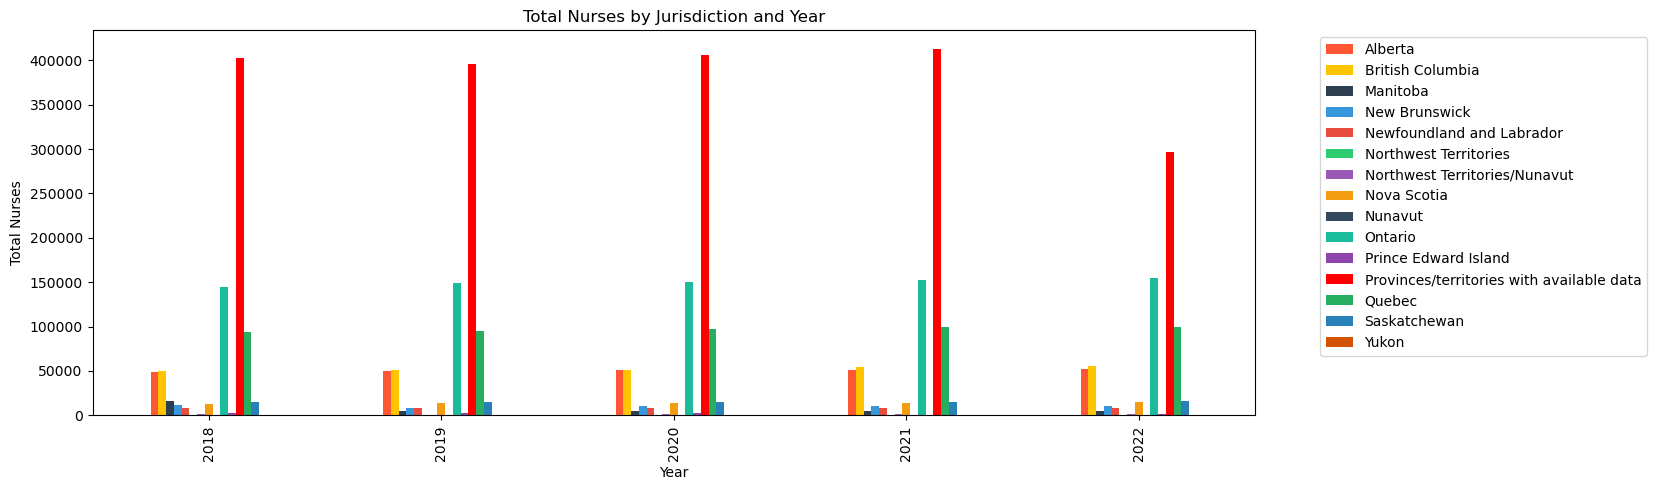

In [39]:
cols = ['#FF5733', '#FFC300', '#2C3E50', '#3498DB', '#E74C3C', '#2ECC71', '#9B59B6', '#F39C12', '#34495E', '#1ABC9C', '#8E44AD', '#FF0000', '#27AE60', '#2980B9', '#D35400']

fig, ax = plt.subplots(figsize=(15, 5))
total_nurses.unstack().plot(kind='bar', ax=ax, width=0.5, color=cols)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Total Nurses')
plt.title('Total Nurses by Jurisdiction and Year')
plt.show()

In [40]:
#total_nurses.to_csv('data.csv', index=False)
#item = gis.content.add({'type': 'CSV', 'title': 'My Data'}, data='data.csv')
#item.publish()

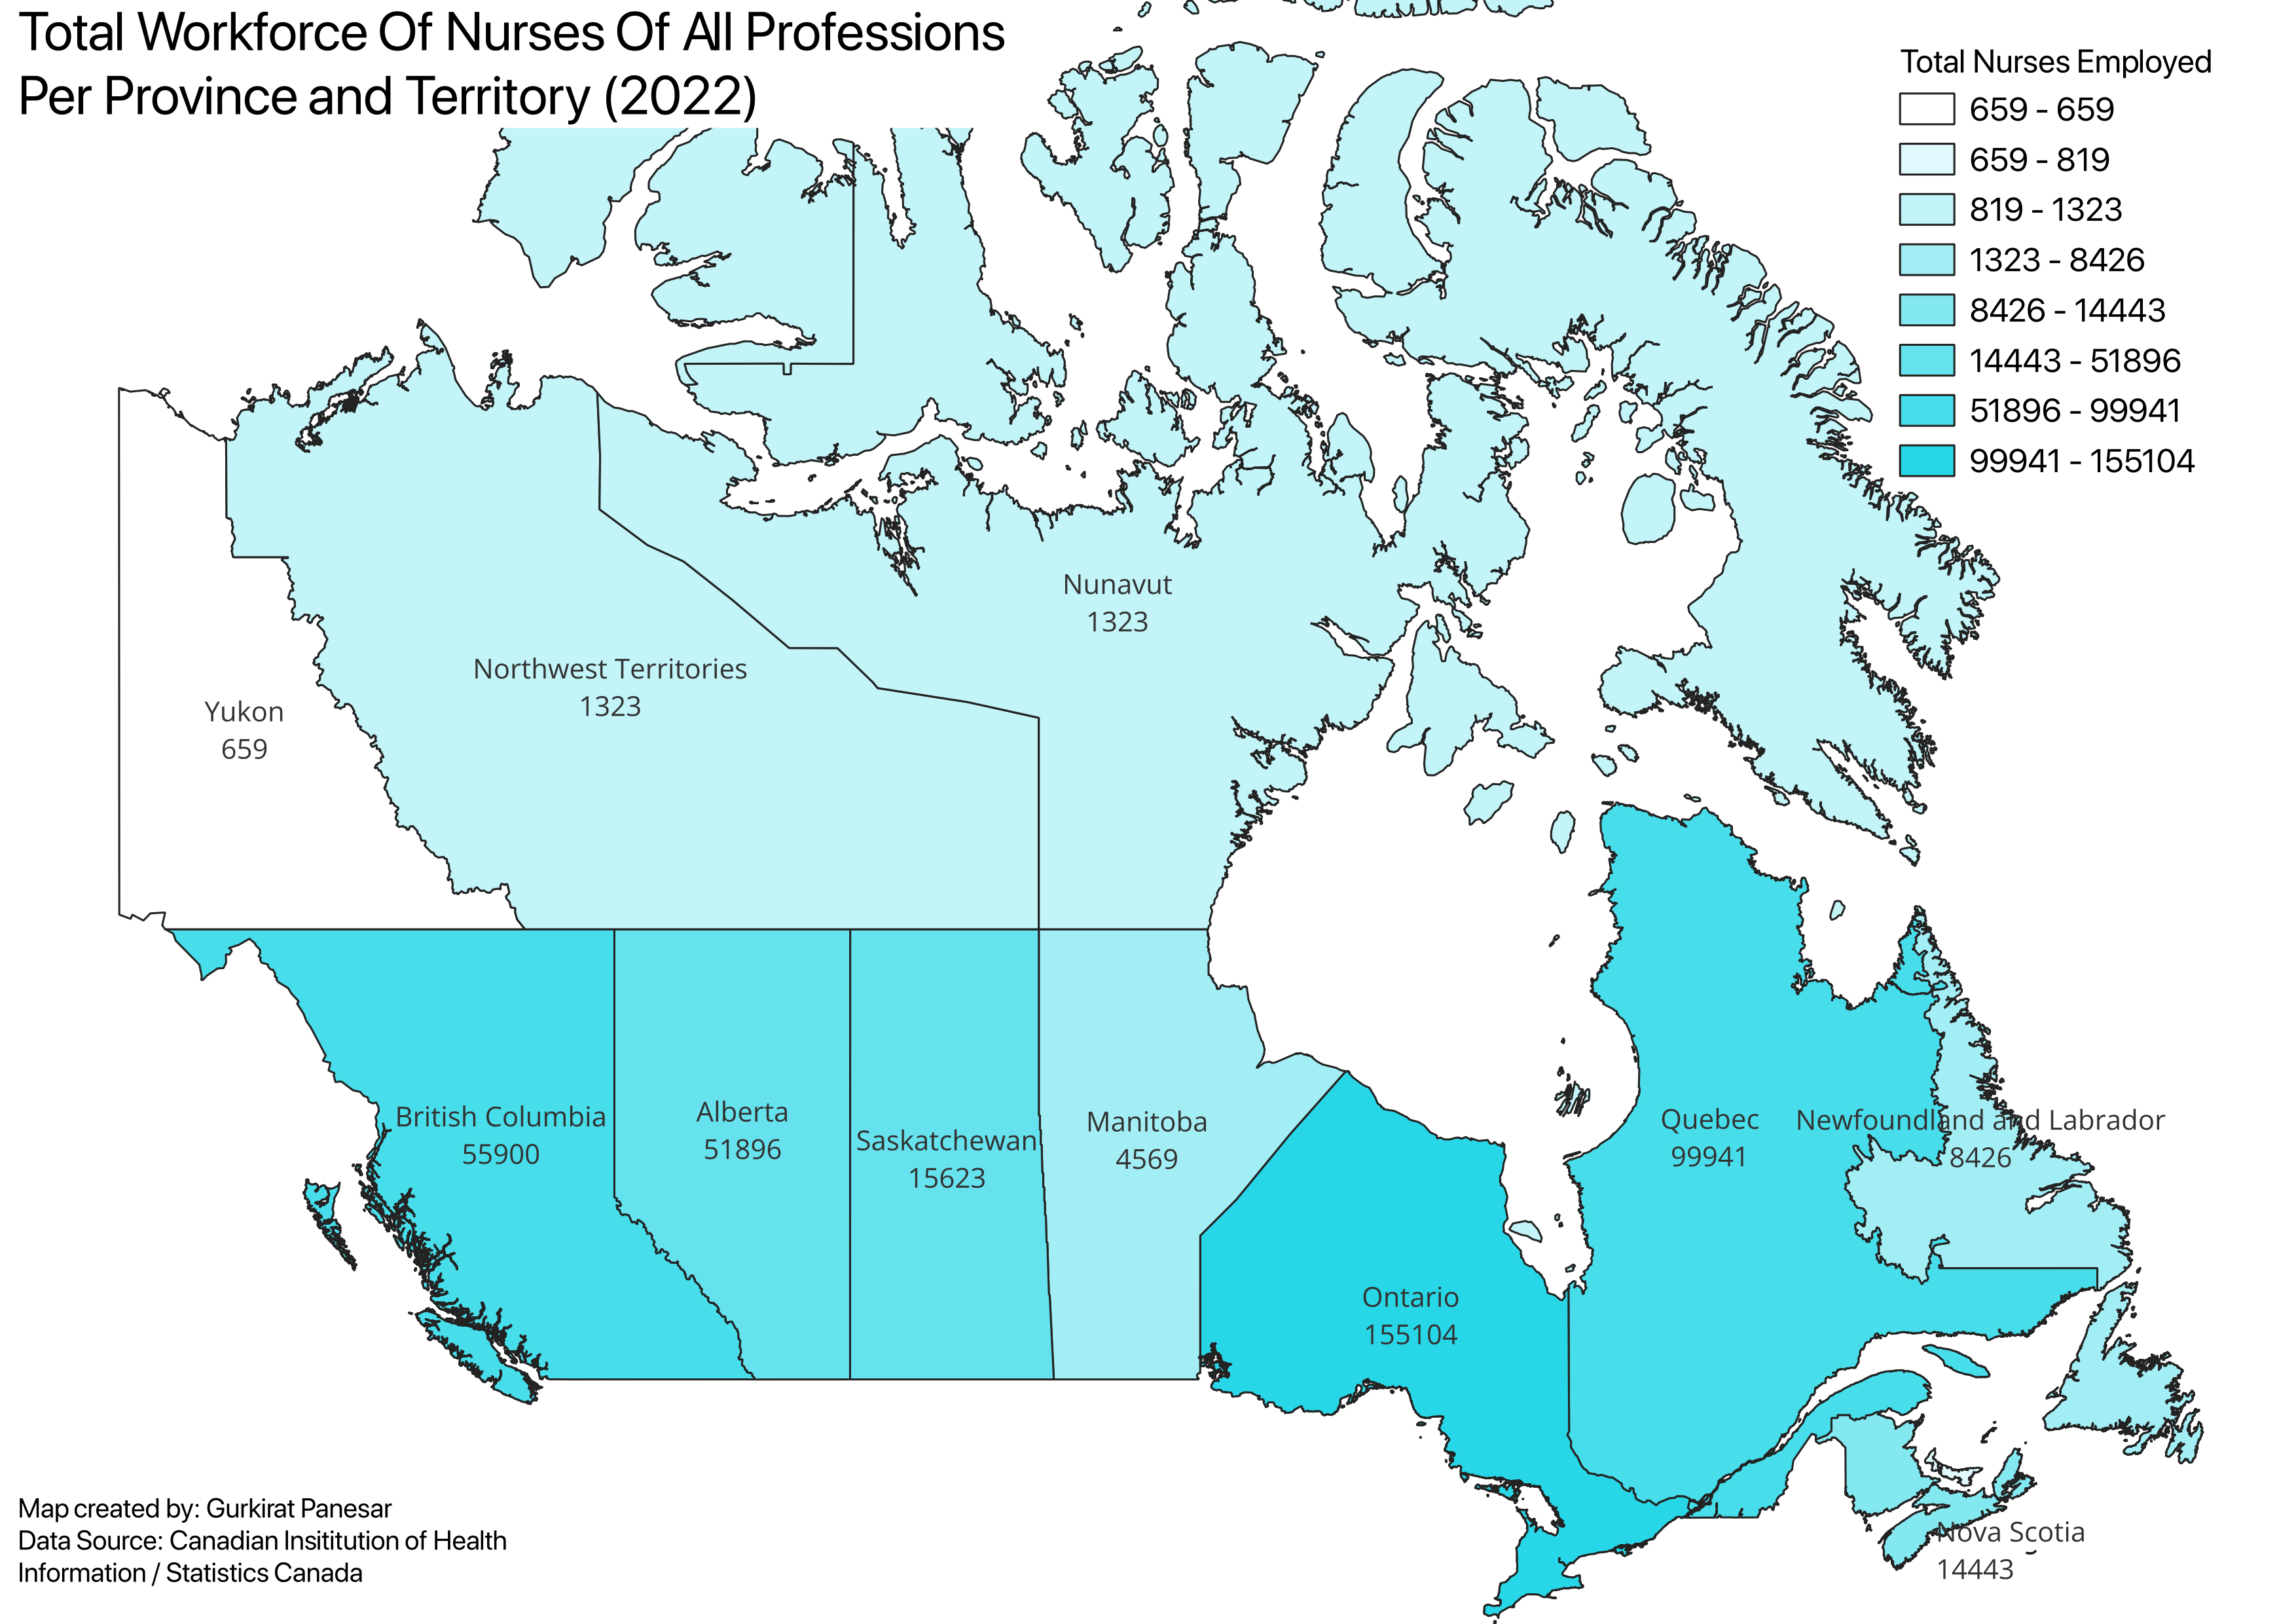

In [1]:
from IPython.display import Image
Image("/arcgis/home/totalnurses.png")

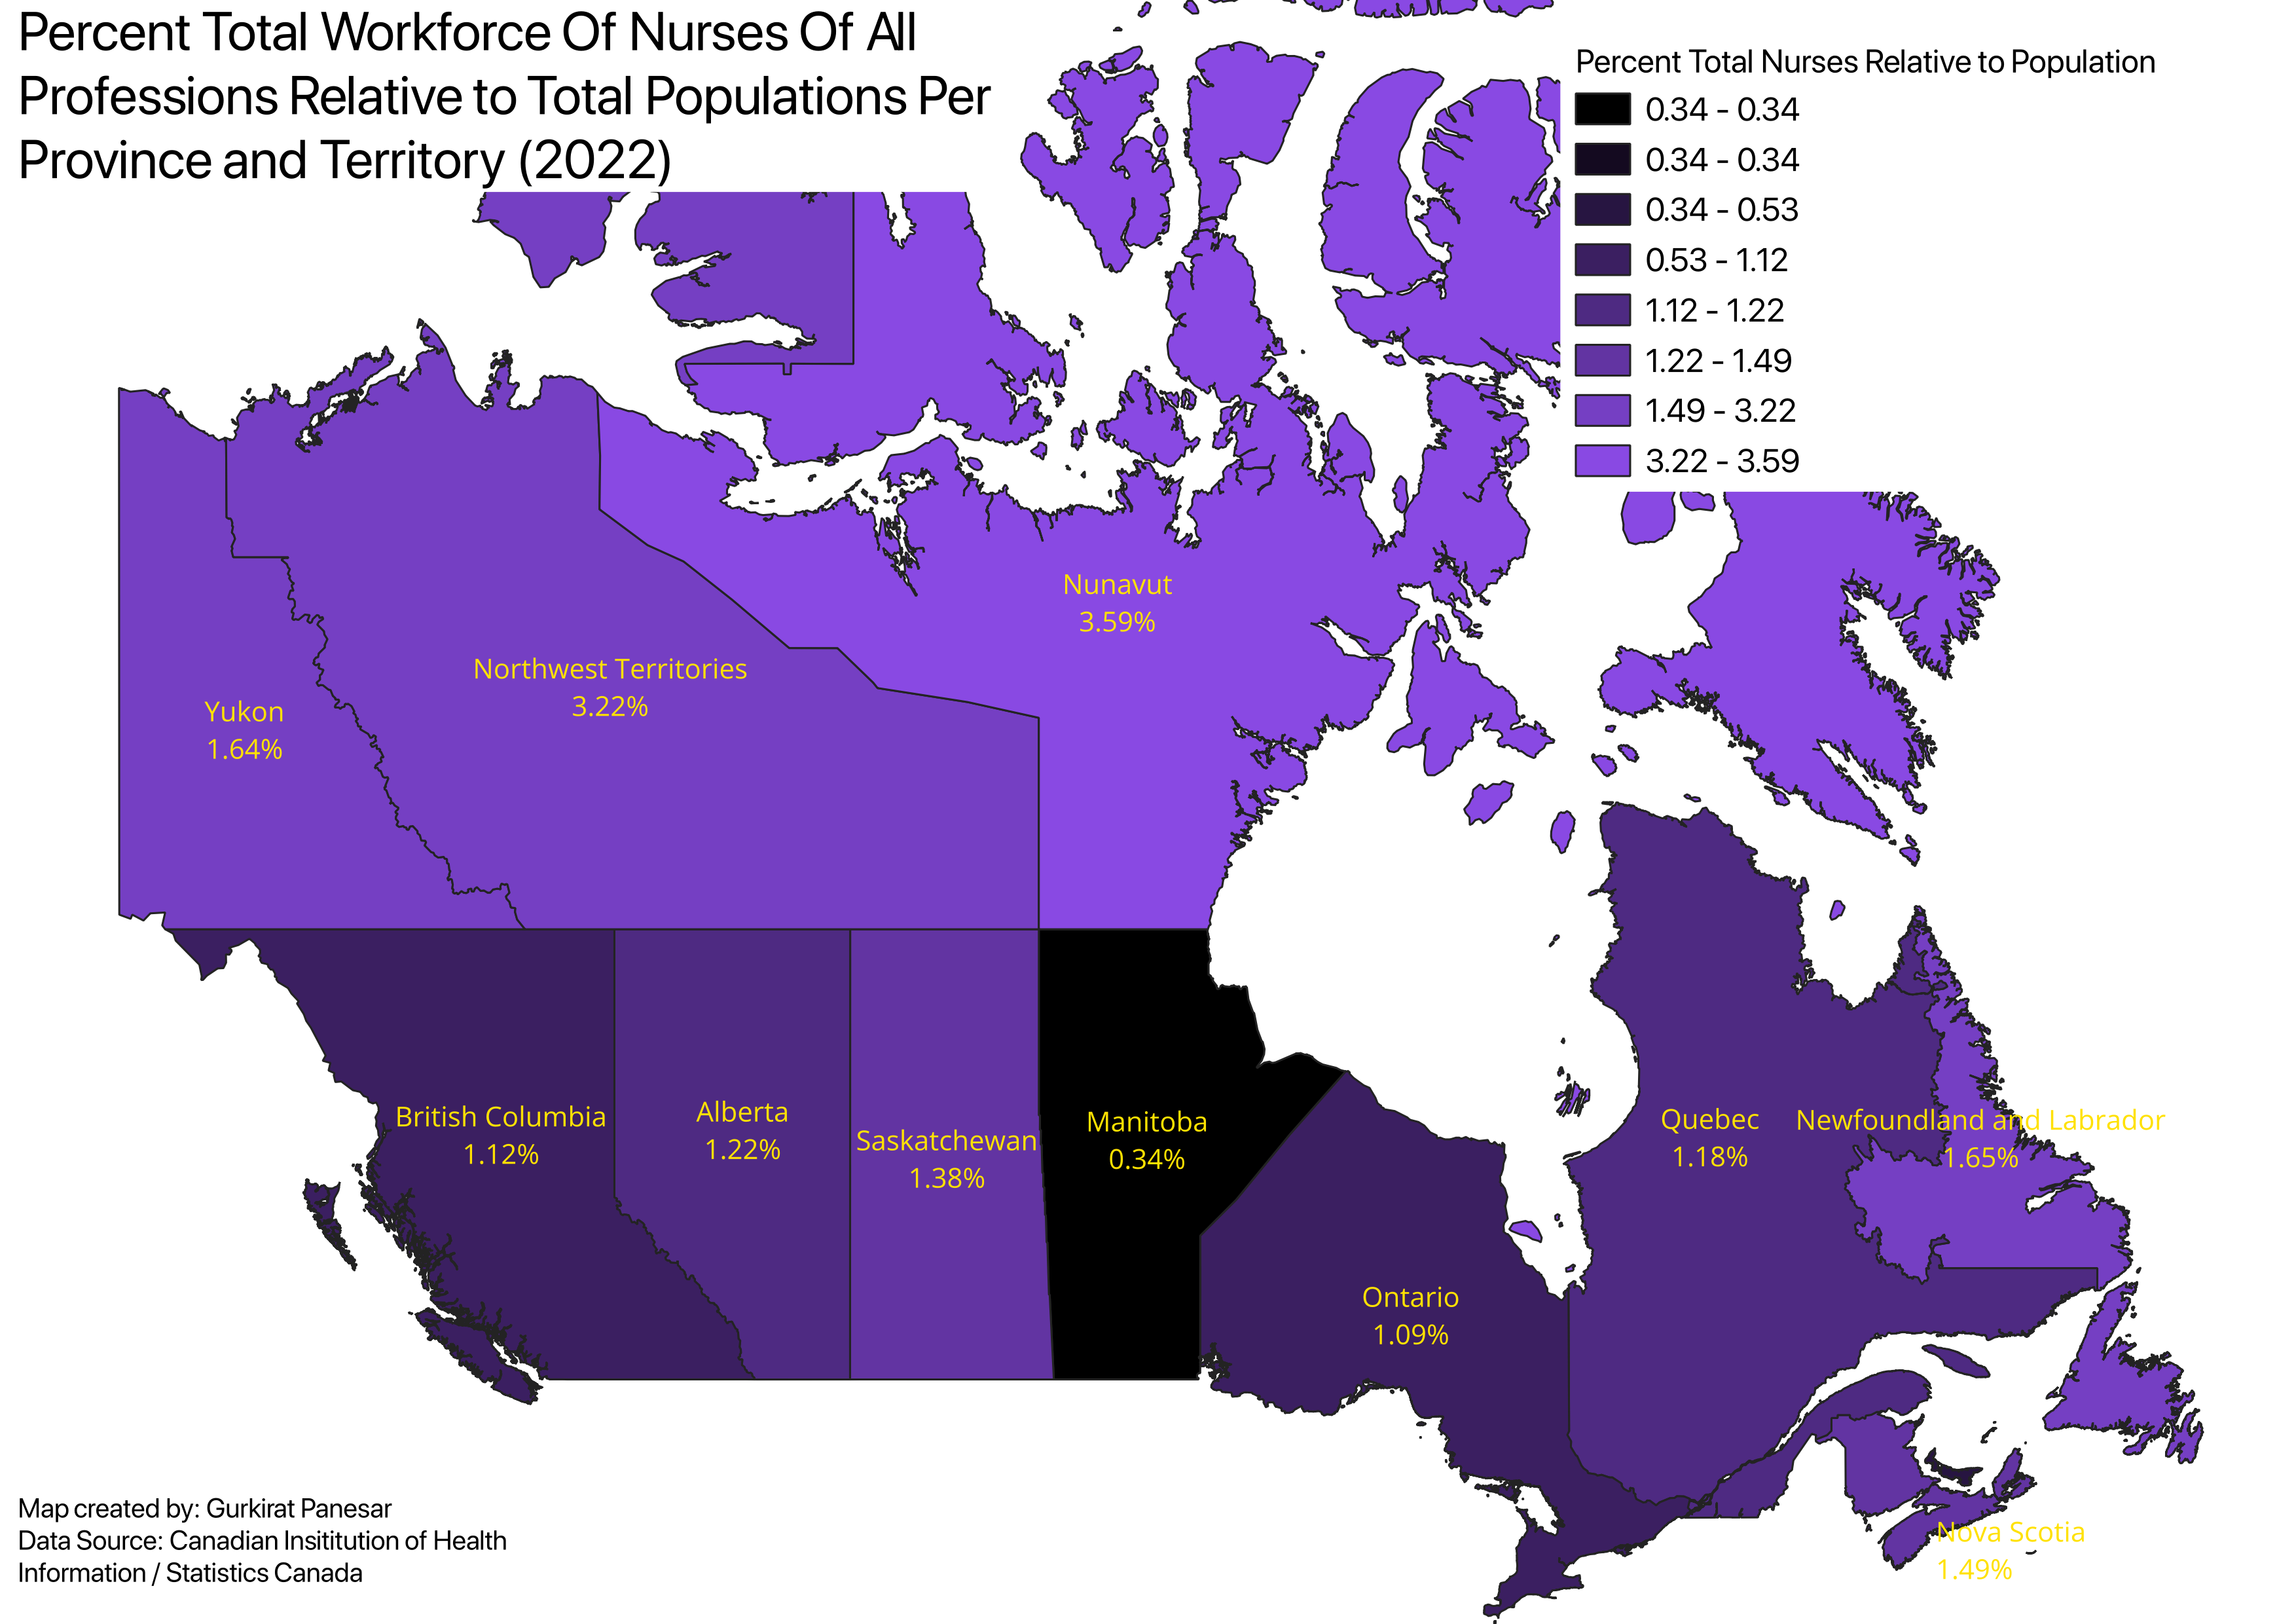

In [2]:
Image("/arcgis/home/percentnurses.png")

### Professional Workforce Analysis

In [43]:
unique_professionals = nursing_workforce["Type of professional"].unique()
unique_workforces = [col for col in nursing_workforce.columns if 'place of work' in col]
unique_resp = [col for col in nursing_workforce.columns if 'area of responsibility' in col]
unique_geo = [col for col in nursing_workforce.columns if 'geography' in col]
print(unique_professionals)
print(unique_workforces)
print(unique_resp)
print(unique_geo)

['Nurse practitioners' 'Registered nurses' 'Registered psychiatric nurses'
 'Licensed practical nurses']
['Workforce: place of work, hospital', 'Workforce: place of work, community health', 'Workforce: place of work, nursing home/LTC', 'Workforce: place of work, other', 'Workforce: place of work, not stated']
['Workforce: area of responsibility, direct care', 'Workforce: area of responsibility, administration', 'Workforce: area of responsibility, education', 'Workforce: area of responsibility, research', 'Workforce: area of responsibility, not stated']
['Workforce: geography, urban', 'Workforce: geography, rural/remote', 'Workforce: geography, not stated']


In [44]:
place_of_work = nursing_workforce.groupby(["Type of professional", "Workforce: place of work, hospital",
                                      "Workforce: place of work, community health",
                                      "Workforce: place of work, nursing home/LTC",
                                      "Workforce: place of work, other",
                                      "Workforce: place of work, not stated"])["Workforce: number of nurses"].sum().reset_index()

area_of_resp = nursing_workforce.groupby(["Type of professional", "Workforce: area of responsibility, direct care",
    "Workforce: area of responsibility, administration",
    "Workforce: area of responsibility, education",
    "Workforce: area of responsibility, research",
    "Workforce: area of responsibility, not stated"])["Workforce: number of nurses"].sum().reset_index()

geography = nursing_workforce.groupby(["Type of professional", "Workforce: geography, urban",
    "Workforce: geography, rural/remote",
    "Workforce: geography, not stated"])["Workforce: number of nurses"].sum().reset_index()

melted_df = pd.melt(place_of_work, id_vars="Type of professional", value_vars=unique_workforces, var_name="Workplace Type", value_name="Total Nurses")
melted_df2 = pd.melt(area_of_resp, id_vars="Type of professional", value_vars=unique_resp, var_name="Responsibility Type", value_name="Total Nurses")
melted_df3 = pd.melt(geography, id_vars="Type of professional", value_vars=unique_geo, var_name="Geography Type", value_name="Total Nurses")

In [45]:
def add_bar_label(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

#### Type of Professional By: Place Of Work
> In this section we get a brief look at the distributions of nurse professionals at various places of work with hospitals containing the highest total as expected this information can be useful to see how this impacts the healthcare system as a whole

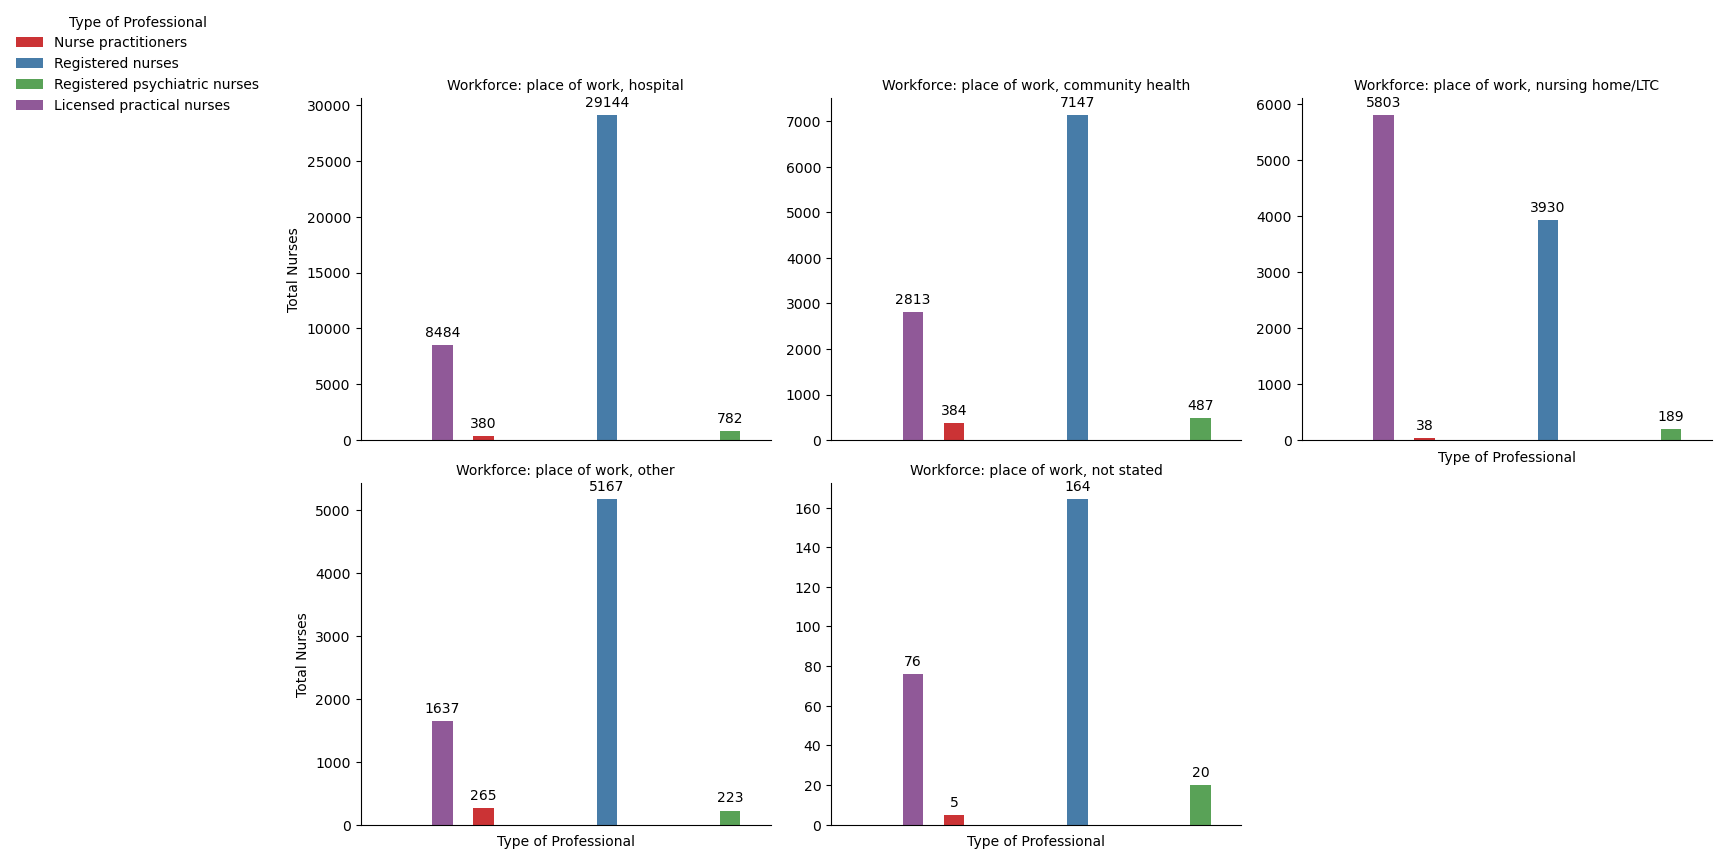

In [46]:
g = sns.FacetGrid(melted_df, col="Workplace Type", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Type of professional", y="Total Nurses", palette="Set1", hue="Type of professional",hue_order=unique_professionals, errorbar=None)
g.set_axis_labels("Type of Professional", "Total Nurses")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    add_bar_label(ax)
g.set(xticks=[])
g.add_legend(title="Type of Professional", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

#### Type of Professional By: Area of Responsibility
> In this section we get a brief look at the distributions of nurse professionals in terms of thier areas of responisbility with direct care being dominent for obviouse reasons. Understanding how this information impacts the healthcare system can be useful.

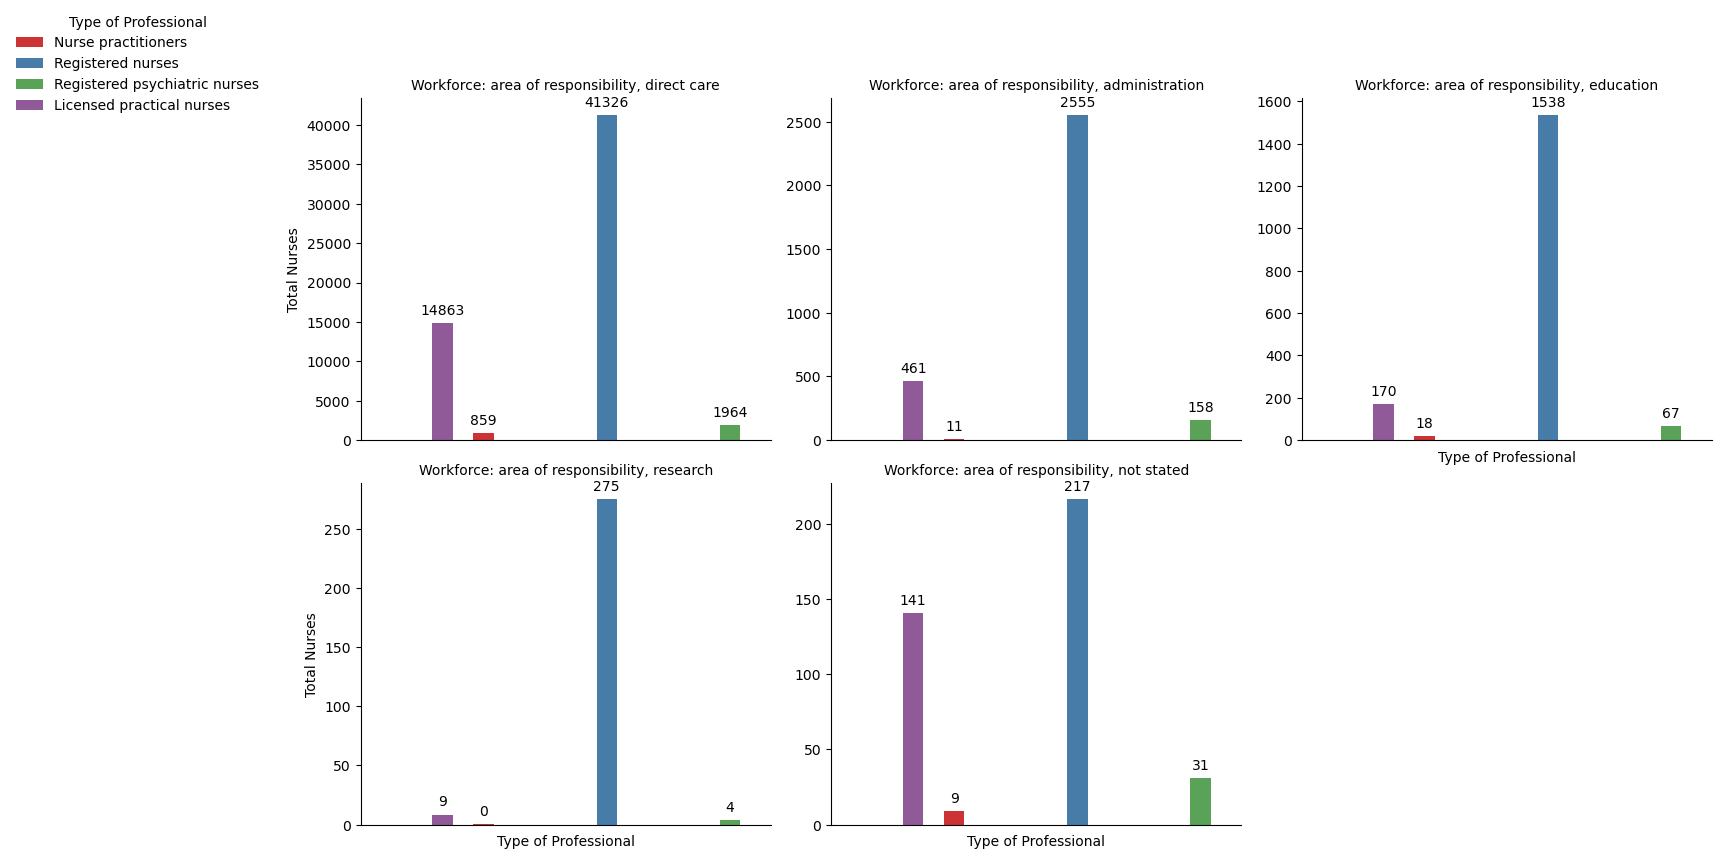

In [47]:
g = sns.FacetGrid(melted_df2, col="Responsibility Type", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Type of professional", y="Total Nurses", palette="Set1", hue="Type of professional",hue_order=unique_professionals, errorbar=None)
g.set_axis_labels("Type of Professional", "Total Nurses")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    add_bar_label(ax)
g.set(xticks=[])
g.add_legend(title="Type of Professional", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()

#### Type of Professional By: Geography Type
> In this section we get a brief look at the distributions of nurse professionals in terms of thier geography type. From this we can see that urban areas have a dominently greater workforce of nurses of all kinds as compared to Rural/remote areas which is an issue. How redistributing the workforce to variose areas can be useful to understand

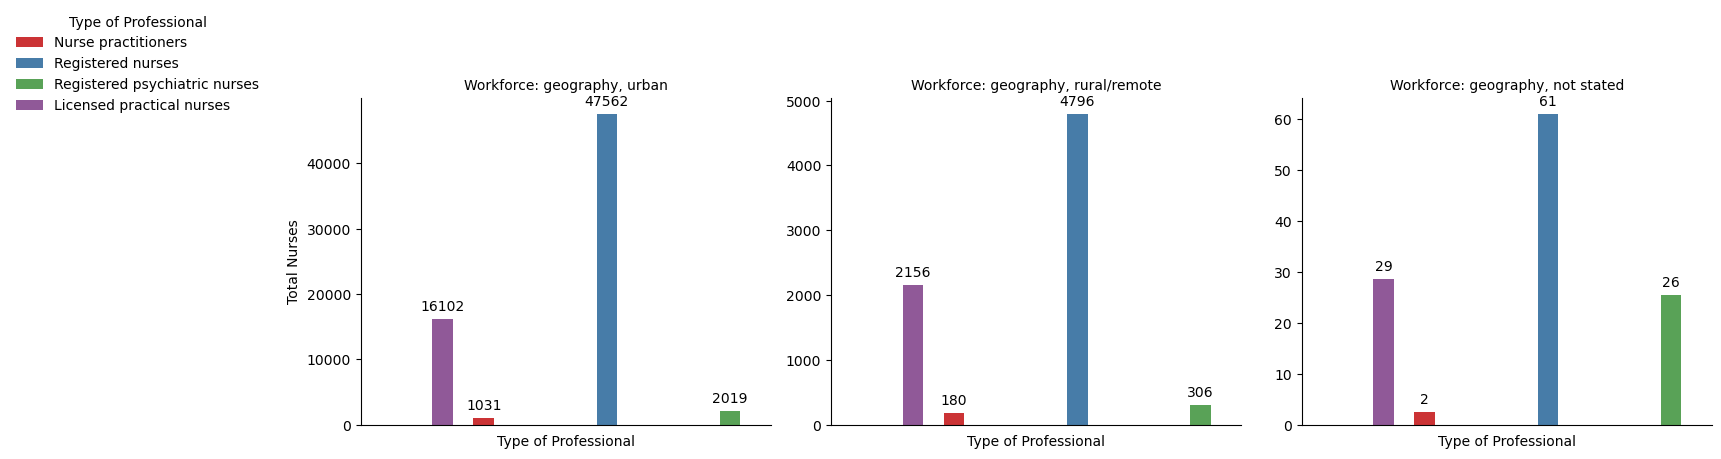

In [48]:
g = sns.FacetGrid(melted_df3, col="Geography Type", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Type of professional", y="Total Nurses", palette="Set1", hue="Type of professional",hue_order=unique_professionals, errorbar=None)
g.set_axis_labels("Type of Professional", "Total Nurses")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    add_bar_label(ax)
g.set(xticks=[])
g.add_legend(title="Type of Professional", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()